In [16]:
%pylab
%matplotlib inline

import _image_processing
import _image_curve
import curveshortening

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


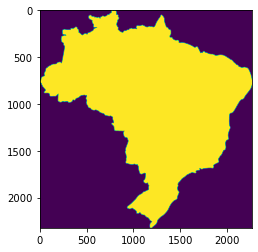

In [17]:
im = _image_processing.load_image(r"C:/Users/ghage/PycharmProjects/morphoscale/lib/silhouettes/brazil-silhouette.bmp")
plt.imshow(im)

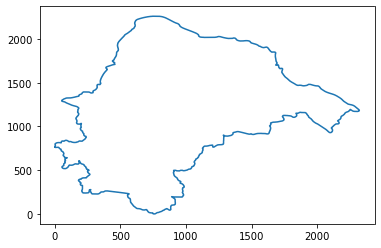

In [10]:
curve = _image_curve.ImageCurve(im).curve()
plt.plot(*curve.transpose())

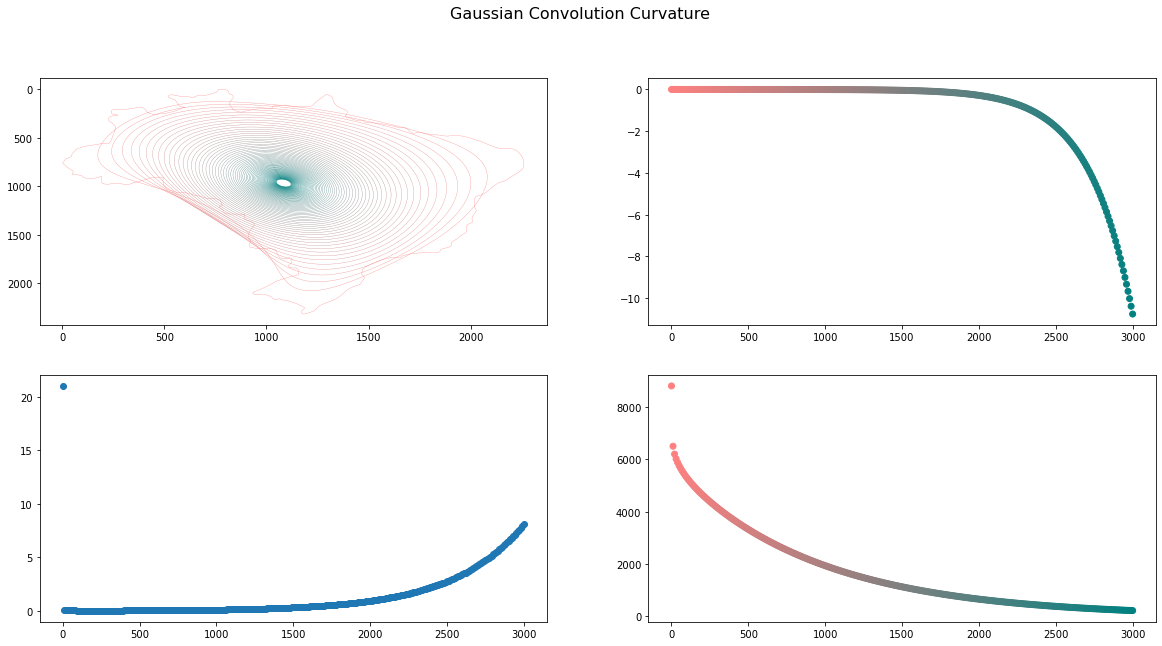

In [38]:
fig, axs = subplots(2, 2, figsize=(20, 10))
fig.suptitle('Gaussian Convolution Curvature', fontsize=16)
axs[0,0].invert_yaxis()
ec = np.copy(curve).astype(float)
etemp = curveshortening._gaussian_filter(ec, 10)
# etemp = ec
curvatures = [curveshortening._curvature(etemp).sum()]
sqcurvs = [(curveshortening._curvature(etemp)**2).sum()]
arc_lengths = [curveshortening._edge_length(etemp).sum()]
step = 300
for i in range(step):
    if not i % 4:
        axs[0,0].plot(*etemp.transpose()[[1, 0], :], color=((1-i/step)**2, 0.5, 0.5), linewidth=0.3)
    etemp = curveshortening._gaussian_filter(etemp, 200)
    curvatures.append(curveshortening._curvature(etemp).sum())
    
    sqcurvs.append((curveshortening._curvature(etemp)**2).sum())
    
    arc_lengths.append(curveshortening._edge_length(etemp).sum())
axs[0,1].scatter(arange(step+1)*10, - np.array(sqcurvs) / arc_lengths * arange(step+1), c=[(1-i/(step+1), 0.5, 0.5) for i in range(step+1)])
axs[1,1].scatter(arange(step+1)*10, arc_lengths, c=[(1-i/(step+1), 0.5, 0.5) for i in range(step+1)])
axs[1,0].scatter(arange(step+1)*10, np.array(sqcurvs))


# ec = np.copy(e).astype(float)
# for sigma in [0.02*step*10, 0.1*step*10, 0.2*step*10, 0.4*step*10, step*10]:
#     sigma = int(sigma)
#     etemp = ndimage.gaussian_filter1d(ec, sigma, mode='wrap', axis=0)
#     axs[0,0].plot(*ndimage.gaussian_filter1d(ec, sigma, mode='wrap', axis=0).transpose()[[1, 0], :], 
#           c=(1-(sigma/(step*10))**(1/3), 0.5, 0.5), linewidth=2)
#     _ = axs[0,0].annotate(r'$\sigma$ = ' + str(sigma), etemp[200, ::-1], size=16, color=(1-(sigma/(step*10))**(1/3), 0.5, 0.5), 
#                  textcoords='offset pixels', xytext=(10, 4))

In [ ]:
fig, axs = subplots(2, 2, figsize=(20, 10))
fig.suptitle('Gaussian Convolution Curvature', fontsize=16)
axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
ec = np.copy(curve).astype(float)
etemp = curveshortening._gaussian_filter(ec, 10)
# etemp = ec
curvatures = [curveshortening._curvature(etemp).sum()]
sqcurvs = [(curveshortening._curvature(etemp)**2).sum()]
arc_lengths = [curveshortening._edge_length(etemp).sum()]
step = 100
for i in range(step):
    if not i % 4:
        axs[0,0].plot(*etemp.transpose()[[1, 0], :], color=((1-i/step)**2, 0.5, 0.5), linewidth=0.3)
    etemp = curveshortening._gaussian_filter(ec, (i+1)*50)
    curvatures.append(curveshortening._curvature(etemp).sum())
    
    sqcurvs.append((curveshortening._curvature(etemp)**2).sum())
    
    arc_lengths.append(curveshortening._edge_length(etemp).sum())
    
etemp = curveshortening._gaussian_filter(ec, 10)
    
for i in range(step):
    if not i % 4:
        axs[0,1].plot(*etemp.transpose()[[1, 0], :], color=((1-i/step)**2, 0.5, 0.5), linewidth=0.3)
    etemp = curveshortening._gaussian_filter(etemp, 200)
    curvatures.append(curveshortening._curvature(etemp).sum())
    
    sqcurvs.append((curveshortening._curvature(etemp)**2).sum())
    
    arc_lengths.append(curveshortening._edge_length(etemp).sum())
    
# axs[0,1].scatter(arange(step+1)*10, - np.array(sqcurvs) / arc_lengths * arange(step+1), c=[(1-i/(step+1), 0.5, 0.5) for i in range(step+1)])
# axs[1,1].scatter(arange(step+1)*10, arc_lengths, c=[(1-i/(step+1), 0.5, 0.5) for i in range(step+1)])
# axs[1,0].scatter(arange(step+1)*10, np.array(sqcurvs))


# ec = np.copy(e).astype(float)
# for sigma in [0.02*step*10, 0.1*step*10, 0.2*step*10, 0.4*step*10, step*10]:
#     sigma = int(sigma)
#     etemp = ndimage.gaussian_filter1d(ec, sigma, mode='wrap', axis=0)
#     axs[0,0].plot(*ndimage.gaussian_filter1d(ec, sigma, mode='wrap', axis=0).transpose()[[1, 0], :], 
#           c=(1-(sigma/(step*10))**(1/3), 0.5, 0.5), linewidth=2)
#     _ = axs[0,0].annotate(r'$\sigma$ = ' + str(sigma), etemp[200, ::-1], size=16, color=(1-(sigma/(step*10))**(1/3), 0.5, 0.5), 
#                  textcoords='offset pixels', xytext=(10, 4))